In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_model = pd.read_csv('df_model.csv')

In [3]:
df_model.shape

(1000, 35)

In [4]:
df_dummies = pd.get_dummies(df_model, drop_first = True)
df_dummies

,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,"agegrp_(40.0, 45.0]","agegrp_(45.0, 50.0]","agegrp_(50.0, 55.0]","agegrp_(55.0, 60.0]","agegrp_(60.0, 70.0]",auto_make_country_Ger,auto_make_country_Jan,Car_model_Sedan,Car_model_Supercar,Car_model_Truck
0,48,521585,1000,1406.91,0,466132,5,1,1,2,...,0,1,0,0,0,0,0,1,0,0
1,42,342868,2000,1197.22,5000000,468176,8,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,29,687698,2000,1413.14,5000000,430632,7,3,2,3,...,0,0,0,0,0,0,0,0,0,1
3,41,227811,2000,1415.74,6000000,608117,5,1,1,2,...,1,0,0,0,0,0,0,0,0,0
4,44,367455,1000,1583.91,6000000,610706,20,1,0,1,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,1000,1310.80,0,431289,20,1,0,1,...,0,0,0,0,0,0,1,1,0,0
996,41,186934,1000,1436.79,0,608177,23,1,2,3,...,1,0,0,0,0,1,0,1,0,0
997,34,918516,500,1383.49,3000000,442797,4,3,2,3,...,0,0,0,0,0,0,1,1,0,0
998,62,533940,2000,1356.92,5000000,441714,2,1,0,1,...,0,0,0,0,1,1,0,1,0,0


## Random Forest

In [5]:
X = df_dummies.drop('fraud_reported_Y', axis = 1)
y = df_dummies['fraud_reported_Y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
print("testing data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: 1.0
Testing score: 0.795
testing data Accuracy: 0.795


In [8]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,12, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 6, 9, 12, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [100, 200, 300, 400, 500]}


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid)
rf_random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': True}

In [15]:
rf = RandomForestClassifier(n_estimators = 100,min_samples_split = 5,min_samples_leaf = 1,
                            max_features = 'auto',max_depth = 6,bootstrap = True)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
print("testing data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: 0.79125
Testing score: 0.805
testing data Accuracy: 0.805


In [33]:
feature_imp = pd.Series(rf.feature_importances_,df_dummies.drop('fraud_reported_Y',axis = 1 ).columns).sort_values(ascending = False)
feature_1 = feature_imp.head(10)
feature_2 = feature_imp.tail(10)

Text(0.5, 1.0, 'Least 10 important features')

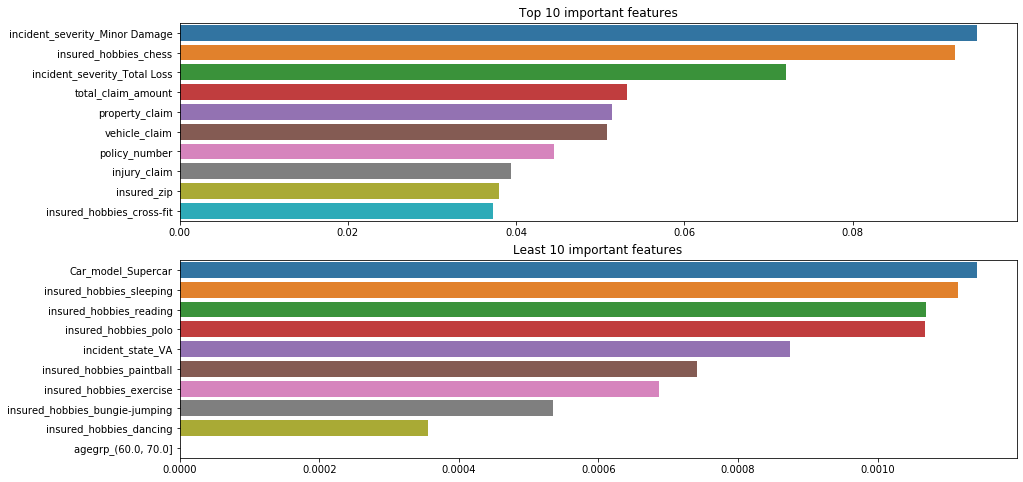

In [44]:
plt.figure(figsize =(15,8))
plt.subplot(211)
sns.barplot(x = feature_1, y = feature_1.index).set_title('Top 10 important features')
plt.subplot(212)
sns.barplot(x = feature_2, y = feature_2.index).set_title('Least 10 important features')

## SVM

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [8]:
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Training score:',model.score(X_train,y_train))
print('Testing score:',model.score(X_test,y_test))
print("testing data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: 0.7525
Testing score: 0.755
testing data Accuracy: 0.755


In [10]:
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001],
             'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True)
grid.fit(X_train,y_train)
print(grid.best_params_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [11]:
model = SVC(C = 0.1, gamma = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Training score:',model.score(X_train,y_train))
print('Testing score:',model.score(X_test,y_test))
print("testing data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: 0.7525
Testing score: 0.755
testing data Accuracy: 0.755
